In [1]:
import regionmask

In [2]:
import numpy as np
import xarray as xr

xr.set_options(display_style="text", display_width=60)

In [3]:
lon = np.arange(-179.5, 180)
lat = np.arange(-89.5, 90)

In [4]:
regionmask.defined_regions.srex

<regionmask.Regions 'SREX'>
Source:   Seneviratne et al., 2012 (https://www.ipcc.ch/site/assets/uploads/2...
overlap:  False

Regions:
 1 ALA       Alaska/N.W. Canada
 2 CGI     Canada/Greenl./Icel.
 3 WNA         W. North America
 4 CNA         C. North America
 5 ENA         E. North America
..  ..                      ...
22 EAS                  E. Asia
23 SAS                  S. Asia
24 SEA                S.E. Asia
25 NAU             N. Australia
26 SAU S. Australia/New Zealand

[26 regions]

In [5]:
mask = regionmask.defined_regions.srex.mask(lon, lat)
mask

<xarray.DataArray 'mask' (lat: 180, lon: 360)> Size: 518kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 ... 88.5 89.5
  * lon      (lon) float64 3kB -179.5 -178.5 ... 178.5 179.5
Attributes:
    standard_name:  region
    flag_values:    [ 1  2  3  4  5  6  7  8  9 10 11 12 ...
    flag_meanings:  ALA CGI WNA CNA ENA CAM AMZ NEB WSA S...

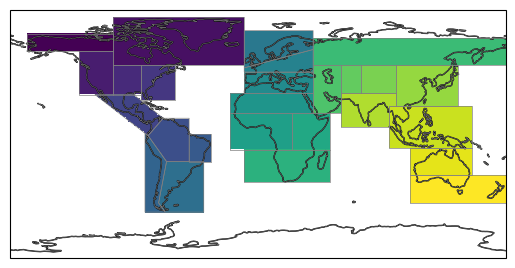

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

f, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
ax.coastlines()

regionmask.defined_regions.srex.plot(
    ax=ax, add_label=False, line_kws=dict(lw=0.5, color="0.5")
)

mask.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)

In [7]:
airtemps = xr.tutorial.load_dataset("air_temperature")

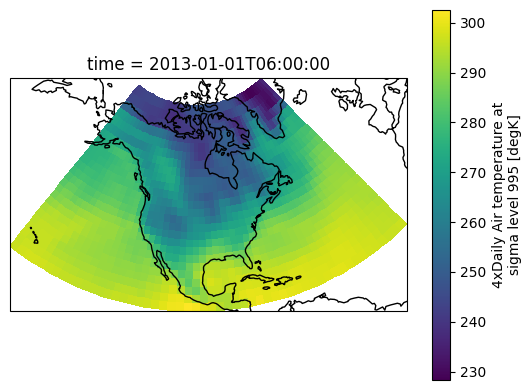

In [8]:
# choose a good projection for regional maps
proj = ccrs.LambertConformal(central_longitude=-100)

ax = plt.subplot(111, projection=proj)

airtemps.isel(time=1).air.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines();

In [9]:
mask = regionmask.defined_regions.srex.mask(airtemps)

In [10]:
lon = airtemps.lon.values
print(f"Grid extent:    {lon.min():3.0f}°E to {lon.max():3.0f}°E")

bounds = regionmask.defined_regions.srex.bounds_global
print(f"Region extent: {bounds[0]:3.0f}°E to {bounds[2]:3.0f}°E")

Grid extent:    200°E to 330°E
Region extent: -168°E to 180°E


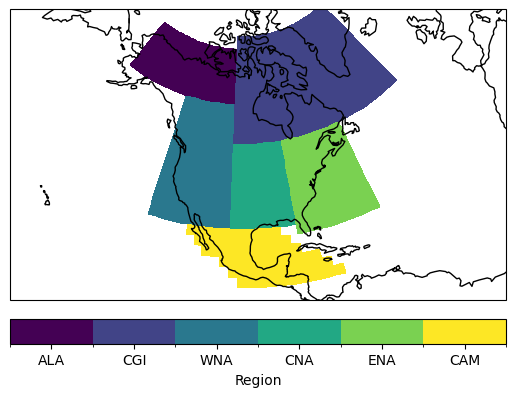

In [11]:
proj = ccrs.LambertConformal(central_longitude=-100)
ax = plt.subplot(111, projection=proj)

low = mask.min()
high = mask.max()

levels = np.arange(low - 0.5, high + 1)

h = mask.plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), levels=levels, add_colorbar=False
)

# for colorbar: find abbreviations of all regions that were selected
reg = np.unique(mask.values)
reg = reg[~np.isnan(reg)]
abbrevs = regionmask.defined_regions.srex[reg].abbrevs

cbar = plt.colorbar(h, orientation="horizontal", fraction=0.075, pad=0.05)

cbar.set_ticks(reg)
cbar.set_ticklabels(abbrevs)
cbar.set_label("Region")

ax.coastlines()

# fine tune the extent
ax.set_extent([200, 330, 10, 75], crs=ccrs.PlateCarree())

In [12]:
mask.cf

Flag Variable:
       Flag Meanings:   ALA:     1 
                        CGI:     2 
                        WNA:     3 
                        CNA:     4 
                        ENA:     5 
                        CAM:     6 

Coordinates:
             CF Axes: * X: ['lon']
                      * Y: ['lat']
                        Z, T: n/a

      CF Coordinates: * longitude: ['lon']
                      * latitude: ['lat']
                        vertical, time: n/a

       Cell Measures:   area, volume: n/a

      Standard Names: * latitude: ['lat']
                      * longitude: ['lon']

              Bounds:   n/a

       Grid Mappings:   n/a

In [13]:
mask_CNA = mask.cf == "CNA"

# show a subset
mask_CNA.sel(lat=30, lon=slice(240, 260))

<xarray.DataArray 'mask' (lon: 9)> Size: 9B
array([False, False, False, False, False, False, False,  True,  True])
Coordinates:
    lat      float32 4B 30.0
  * lon      (lon) float32 36B 240.0 242.5 ... 257.5 260.0

In [14]:
mask_names = regionmask.defined_regions.srex.mask(airtemps, flag="names")

mask_names.cf == "C. North America".replace(" ", "_")

<xarray.DataArray 'mask' (lat: 25, lon: 53)> Size: 1kB
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 ... 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 ... 327.5 330.0

In [15]:
CNA_index = regionmask.defined_regions.srex.map_keys("C. North America")
CNA_index

4

In [16]:
mask_CNA = mask == CNA_index

In [17]:
airtemps_CNA = airtemps.where(mask_CNA)

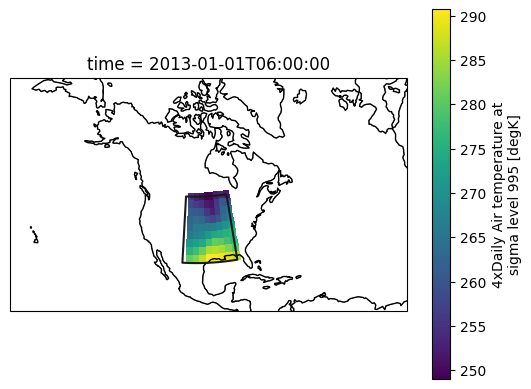

In [18]:
# choose a good projection for regional maps
proj = ccrs.LambertConformal(central_longitude=-100)

ax = plt.subplot(111, projection=proj)

regionmask.defined_regions.srex[["CNA"]].plot(ax=ax, add_label=False)

airtemps_CNA.isel(time=1).air.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree())

ax.coastlines();

In [19]:
weights = np.cos(np.deg2rad(airtemps.lat))

ts_airtemps_CNA = airtemps_CNA.weighted(weights).mean(dim=("lat", "lon")) - 273.15

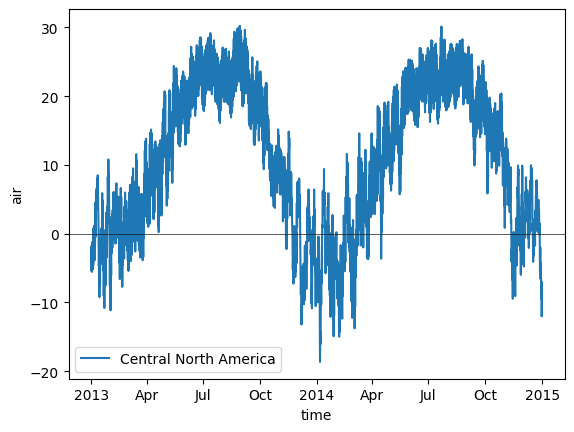

In [20]:
f, ax = plt.subplots()
ts_airtemps_CNA.air.plot.line(ax=ax, label="Central North America")

ax.axhline(0, color="0.1", lw=0.5)

plt.legend();